<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-1---Load-the-data" data-toc-modified-id="Problem-1---Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 1 - Load the data</a></span></li><li><span><a href="#Problem-2---Determine-the-gradient" data-toc-modified-id="Problem-2---Determine-the-gradient-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 2 - Determine the gradient</a></span></li><li><span><a href="#Problem-3---Define-the-gradient-function" data-toc-modified-id="Problem-3---Define-the-gradient-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem 3 - Define the gradient function</a></span></li><li><span><a href="#Problem-4---Parameterize-the-model" data-toc-modified-id="Problem-4---Parameterize-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Problem 4 - Parameterize the model</a></span></li><li><span><a href="#Problem-5---Plot-the-results" data-toc-modified-id="Problem-5---Plot-the-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Problem 5 - Plot the results</a></span></li></ul></div>

<b>If you are using google colab you should save this notebook and any associated textfiles to their own folder on your google drive. Then you will need to adapt the following commands so that the notebook runs from the location of that folder.</b>

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Colab command to navigate to the folder holding the homework,
# CHANGE FOR YOUR SPECIFIC FOLDER LOCATION IN GOOGLE DRIVE
# Note: if there are spaces in the path, you need to preceed them with a backslash '\'
#%cd /content/drive/My\ Drive/CHE597/Lectures/8-Optimization

In [3]:
# Preliminary imports for the assignment
import matplotlib.pyplot as plt
import numpy as np

In this problem we will fit some kinetic data as a function of the concetration of one of the reactants as 

$$ y_p =  \frac{\beta_1 x}{\beta_2 + x} $$

where $x$ is the concentration and $y_p$ is the predicted rate. There are two parameters that need to be determined (i.e., $\beta_1$ and $\beta_2$) and the problem is non-linear. We will use the gradient descent algorithm from the `optimization.ipynb` notebook to determine the optimal parameters $\beta_1$ and $\beta_2$ that minimize the mean squared error:

$$ \chi^2 = \frac{1}{N}\sum_i^N\left(y_{p,i} - y_i \right)^2 $$

where $y$ is the rate data from the file `kinetics.txt`

## Problem 1 - Load the data
The experimental concentration vs rate data is in the file `kinetics.txt`. 

1) Load the data and assign the concentration data to a pointer `x` and the rate data to the pointer `y`.

2) Make a plot of `x` vs `y` with log scaling on the x-axis.

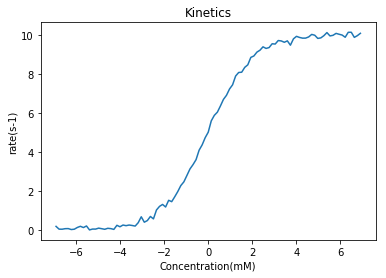

In [4]:
### Load data here
data = np.genfromtxt('kinetics.txt', skip_header=1)
x = data[:,0]
y = data[:,1]

plt.plot(np.log(x),y)
plt.xlabel('Concentration(mM)')
plt.ylabel('rate(s-1)')
plt.title('Kinetics')
plt.show()

#print(x)
#print(y)
# Make a plot of x vs y with log scaling on the x-axis

## Problem 2 - Determine the gradient
To apply gradient descent to this problem we require the gradients $\frac{\partial \chi^2}{\partial \beta_1}$ and $\frac{\partial \chi^2}{\partial \beta_2}$. Write out the gradients for the current problem (I'm giving you the first one, <b>double-click to edit this cell and add the second</b>): 

$$ \frac{\partial \chi^2}{\partial \beta_1} = \frac{2}{N}\sum_i^N\left(\frac{\beta_1 x}{\beta_2 + x} - y_i \right)\left(\frac{x}{\beta_2 + x}\right) $$


$$ \frac{\partial \chi^2}{\partial \beta_2} = \frac{2}{N}\sum_i^N\left(\frac{\beta_1 x}{\beta_2 + x} - y_i \right)\left(-\frac{\beta_1 x}{\ (\beta_2 + x)^2}\right) $$



## Problem 3 - Define the gradient function
Now that you know the expressions for the gradient, write a function `grad(params,x,y)` in the cell below that returns the gradient for a given `params` array (i.e., `params` should hold $\beta_1$ and $\beta_2$ in an array) and `x` and `y` data. 

<b>Hint:</b> This is analogous to what was done in the `optimization.ipynb` notebook, but you will have to adapt that function for this problem. 

In [5]:

#def grad(params,x,y):
 # dxda = 0
  #dxdb = 0
  #N = len(x)
  
  # Loop over each sample and calculate the contribution to the gradient
  #for i in range(N):
   #   dxda += 2.0*((params[0]*x)/(params[1]+x)-y[i])*(x/(params[1]+x))
  #    dxdb += 2.0*((params[0]*x)/(params[1]+x)-y[i])*-((params[0]*x)/(params[1]+x)**2)          
      
  # Final gradient has a 1/N term from the xhi^2 expression
 # return np.array([dxda/float(N),dxdb/float(N)])    

#def grad(params,x,y):
  #dxda = 0
  #dxdb = 0
  #N = len(x)
  
  # Loop over each sample and calculate the contribution to the gradient
  #for i in range(N):
  #    dxda += 2.0*((params[0]*x)/(params[1]+x)-y[i])*(x/(params[1]+x))
  #    dxdb += 2.0*((params[0]*x)/(params[1]+x)-y[i])*-((params[0]*x)/(params[1]+x)**2)          
      
  # Final gradient has a 1/N term from the xhi^2 expression
#  return np.array([dxda/float(N),dxdb/float(N)])
#print(grad(params,2,3))
# Vectorized form (eliminate the for loop! Numerically equivalent to the above)
def grad(params,x,y):
  #return np.array([np.mean(2.0*(params[0]*x+params[1]-y)*x),np.mean(2.0*(params[0]*x)/(params[1]+x)**2)])#Long form: Calculate the gradient
  return np.array([np.mean(2.0*((params[0]*x)/(params[1]+x)-y)*(x/(params[1]+x))), np.mean(2.0*((params[0]*x)/(params[1]+x)-y*((-(params[0]*x))/(params[1]+x)**2)))])
  #def grad(params,x,y):
  #dxda = 0
  #dxdb = 0
  #N = len(x)
  
  # Loop over each sample and calculate the contribution to the gradient
  #for i in range(N):
    #  dxda += 2.0*((params[0]*x/params[1]+x)-y[i])*(x/(params[1]+x)
      #dxdb += 2.0*((params[0]*x/params[1]+x)-y[i])*((-(params[0]*x))/(params[1]+x)**2)    
      #dxdb = 2.0*((params[0]*x)/(params[1]+x)-y[i])*((-(params[0]*x))/(params[1]+x)**2) 
      #dxdb += 2.0*((params[0]*x)/(params[1]+x)-y[i])*(x/(params[1]+x))
     # dxdb2 += 2.0*((params[0]*x)/(params[1]+x)-y[i])*((-(params[0]*x))/(params[1]+x)^2) 
     #  dxdb += 2.0*((params[0]*x)/(params[1]+x)-y[i])*((-(params[0]*x))/(params[1]+x)**2)    
  # Final gradient has a 1/N term from the xhi^2 expression
  #return np.array([dxda/float(N),dxdb/float(N)])    

# Vectorized form (eliminate the for loop! Numerically equivalent to the above)
#def grad(params,x,y):
#  return np.array([np.mean(2.0*(params[0]*x+params[1]-y)*x),np.mean(2.0*(params[0]*x+params[1]-y))])

## Problem 4 - Parameterize the model
Now that you have defined the gradient, parameterize the model using gradient descent starting with the initial guess `[0.0,0.0]`. You can write your own gradient descent function to do this, or I have copied the function from `optimization.ipynb` here for you. (I leave it up to you to find a suitable learning rate and termination criteria). 

In [12]:
# Gradient descent function from optimization.ipynb notebook
# OR define your own here
#def grad(params,x,y):
#  return np.array([np.mean(2.0*(params[0]*x+params[1]-y)*x),np.mean(2.0*(params[0]*x+params[1]-y))])

def grad_descent(params,grad,alpha=0.0001,thresh=0.000001,max=1E7):    

    # Each iteration is one parameter update ("epoch")
    for i in range(int(max)):
       
        # Calculate update for this epoch/iteration
        params += [ params[-1] - alpha * grad(params[-1]) ]

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)
#grad_descent([0.0,0.0],0)


In [15]:
grad_0 = lambda params: grad(params,x,y) # give the grad function x and y data 
#print(np.shape([grad]))
#print(np.shape([grad_descent]))

params_GD = grad_descent([[0.0,0.0]],grad_0,alpha=0.00001,thresh=1E-4)
print("\nFinal params (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_GD),len(params_GD)*len(x),params_GD[-1,0],params_GD[-1,1]))


Final params (after 2624 epochs; 265024 d-calcs):
a: 0.0443
b: -1.5969


In [8]:
# Perform the optimization in this cell and print out the initial and final xhi2 value

## Problem 5 - Plot the results
Compare the predictions from the gradient descent model against the data from `kinetics.txt`. Specifically, (1) make a plot of concentration (x) vs rate (y) with both the known data and the model prediction, and (2) make a plot of the concentration vs residual (y_p - y).

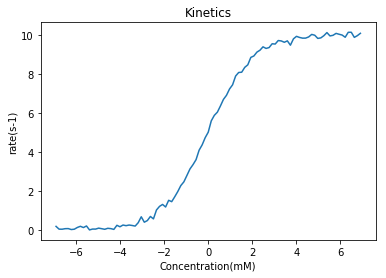

[0.         0.00010043 0.00020086 ... 0.06376935 0.04424577 0.04432585]
[ 0.00000000e+00  0.00000000e+00 -2.00808715e-08 ... -1.51239215e+00
 -1.59690605e+00 -1.59692588e+00]


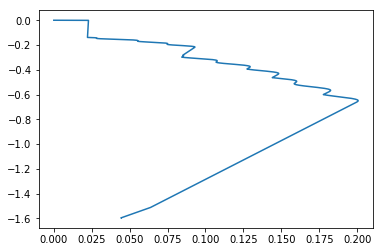

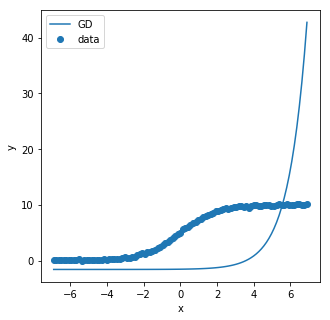

In [25]:

plt.plot(np.log(x),y)
plt.xlabel('Concentration(mM)')
plt.ylabel('rate(s-1)')
plt.title('Kinetics')
plt.show()

#print(params_GD)
dataX = params_GD[:,0]
dataY = params_GD[:,1]
print(dataX)
print(dataY)

plt.plot(dataX,dataY)
plt.show()

x = data[:,0]
y = data[:,1]


# Plot the residual as a function of concentration
#plt.plot(np.log(x),y)
#plt.xlabel('Concentration(mM)')
#plt.ylabel('rate(s-1)')
#plt.title('Kinetics')
#plt.show()

####
a= 0.0443
b= -1.5969

plt.figure(figsize=(5,5))
#plt.plot(np.log(x),a*x+b,color='k',label="generator")
plt.scatter(np.log(x),y,label="data")
plt.plot(np.log(x),x*params_GD[-1,0] + params_GD[-1,1],label="GD")
#plt.plot(x,x*sol[0] + sol[1],label="analytic")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()